<a href="https://colab.research.google.com/github/Jean-yun/Aiffel_project/blob/main/%5BMission_2%5DOnline_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install koreanize-matplotlib --qq
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드

In [3]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


In [6]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [7]:
# 주문 취소 건 제외
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

In [8]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID,InvoiceMonth,TotalPrice
count,530104.000000,530104.000000,397884.000000,530104.000000,530104.000000
mean,10.542037,3.907625,15294.422852,7.560611,20.121871
std,155.524124,35.915681,1713.141602,3.508496,270.356743
min,1.000000,0.001000,12346.000000,1.000000,0.001000
25%,1.000000,1.250000,13969.000000,5.000000,3.750000
50%,3.000000,2.080000,15159.000000,8.000000,9.900000
75%,10.000000,4.130000,16795.000000,11.000000,17.700000
max,80995.000000,13541.330000,18287.000000,12.000000,168469.600000


In [10]:
# 데이터 타입 변경

df["Country"] = df["Country"].astype(str)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int64         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.9+ MB



## 미션1) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요.
또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* 슬라이드 자료에서 "심슨의 역설"을 찾아주세요.

In [12]:
df['StockCode'].value_counts()

85123A    2265
85099B    2112
22423     2017
47566     1706
20725     1595
          ... 
85098B       0
84546        0
84526        0
85110        0
84726        0
Name: StockCode, Length: 4070, dtype: int64

<Axes: xlabel='Country', ylabel='TotalPrice'>

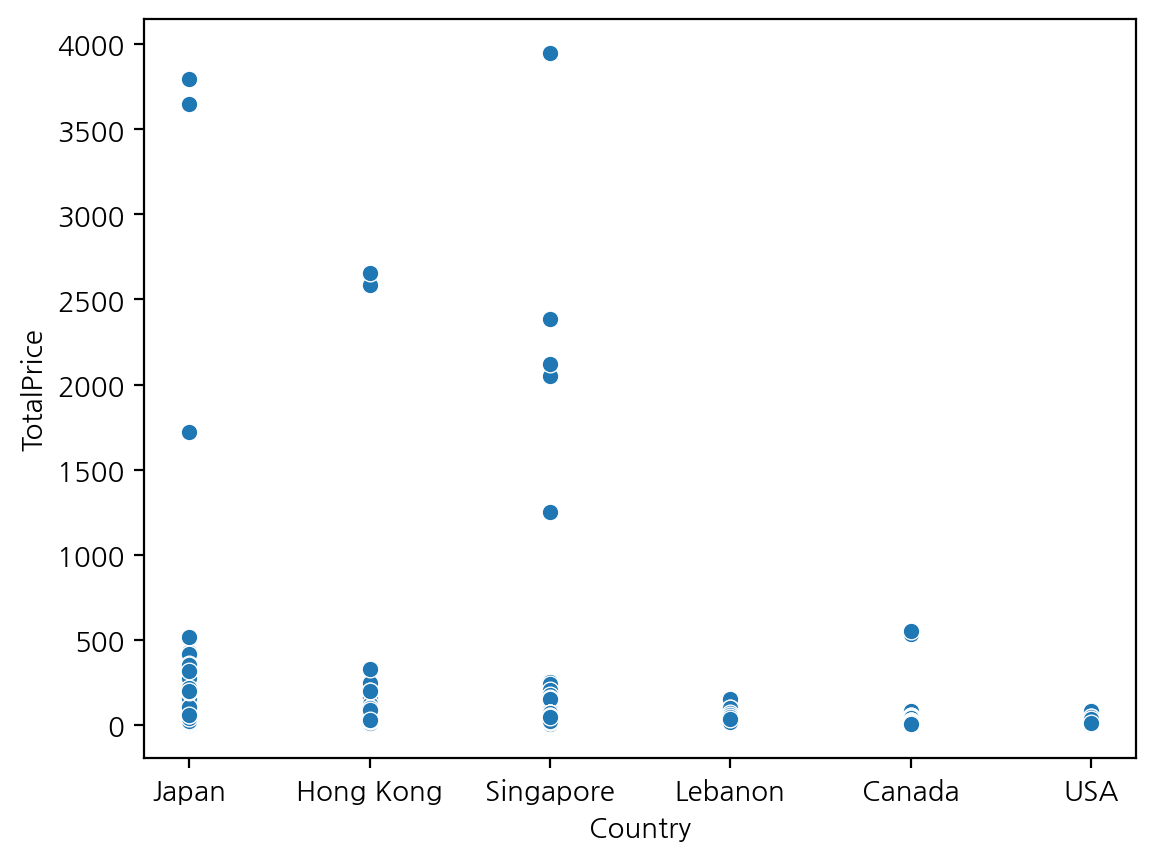

In [13]:
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

#하위그룹 설정해주기
country_sub = df[df['Country'].isin(country_group)]

#국가별 총금액의 분포 확인
sns.scatterplot(data=country_sub, y='TotalPrice', x='Country')


In [14]:
country_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 9783 to 524436
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     1202 non-null   category      
 1   StockCode     1202 non-null   category      
 2   Description   1202 non-null   category      
 3   Quantity      1202 non-null   int32         
 4   InvoiceDate   1202 non-null   datetime64[ns]
 5   UnitPrice     1202 non-null   float64       
 6   CustomerID    918 non-null    float32       
 7   Country       1202 non-null   object        
 8   InvoiceMonth  1202 non-null   int64         
 9   TotalPrice    1202 non-null   float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='Country', ylabel='Quantity'>

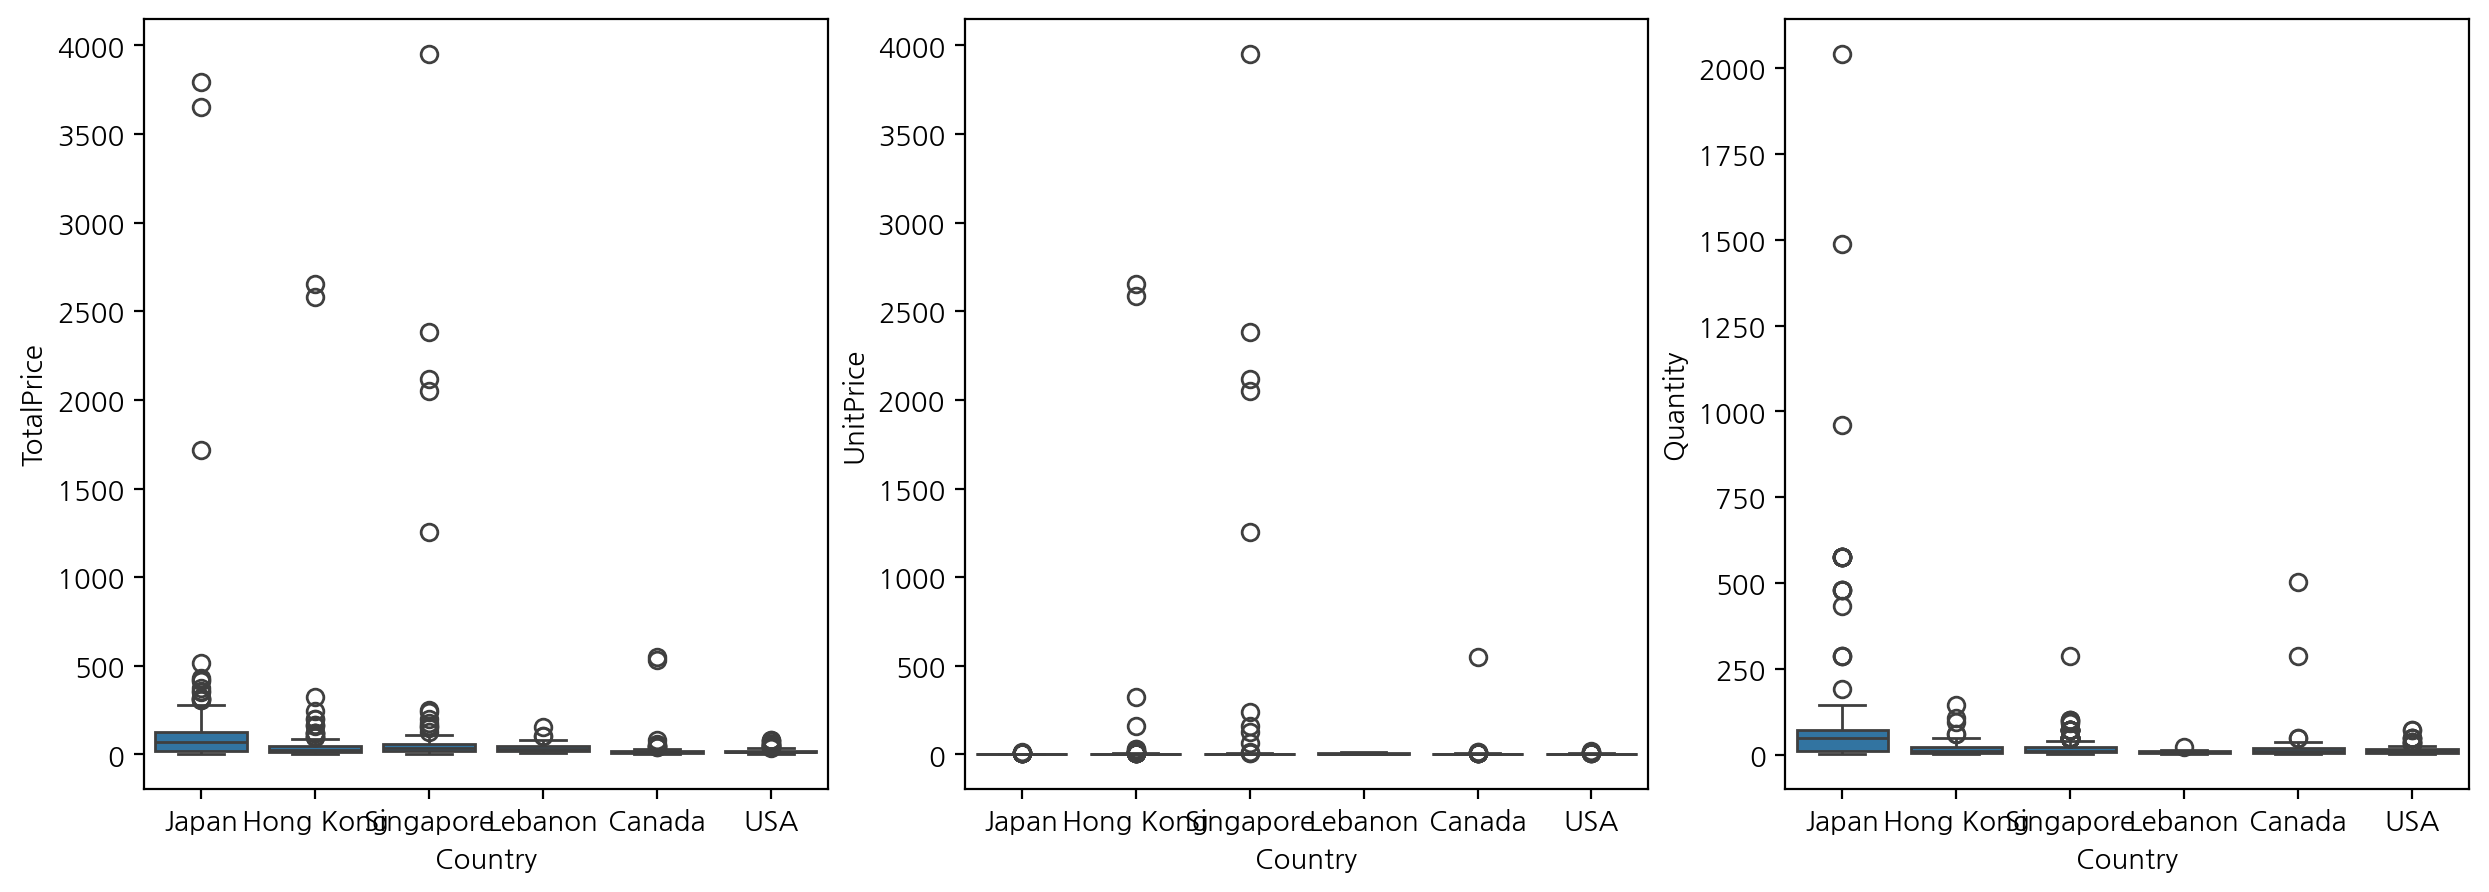

In [15]:
# 이상치 확인
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data=country_sub, y='TotalPrice', x='Country', ax=axes[0])
sns.boxplot(data=country_sub, y='UnitPrice', x='Country', ax=axes[1])
sns.boxplot(data=country_sub, y='Quantity', x='Country', ax=axes[2])

In [16]:
#이상치 제거
def outlier_remove(data, column, threshold=3):
  z_score = np.abs(data[column]- np.mean(data[column])) / np.std(data[column])
  filtered_data = data[z_score < threshold]
  return pd.DataFrame(filtered_data)


In [17]:
country_sub = outlier_remove(country_sub, 'TotalPrice')
country_sub = outlier_remove(country_sub, 'Quantity')
country_sub = outlier_remove(country_sub, 'UnitPrice')
country_sub

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,12,15.30
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9785,537218,22716,CARD CIRCUS PARADE,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9786,537218,22983,CARD BILLBOARD FONT,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9787,537218,22030,SWALLOWS GREETING CARD,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
...,...,...,...,...,...,...,...,...,...,...
524432,580553,20675,BLUE POLKADOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524433,580553,20676,RED RETROSPOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524434,580553,20975,12 PENCILS SMALL TUBE RED RETROSPOT,72,2011-12-05 10:14:00,0.65,12646.0,USA,12,46.80
524435,580553,22083,PAPER CHAIN KIT RETROSPOT,12,2011-12-05 10:14:00,2.95,12646.0,USA,12,35.40


Text(0.5, 1.0, 'Distribution of Quantity by Country')

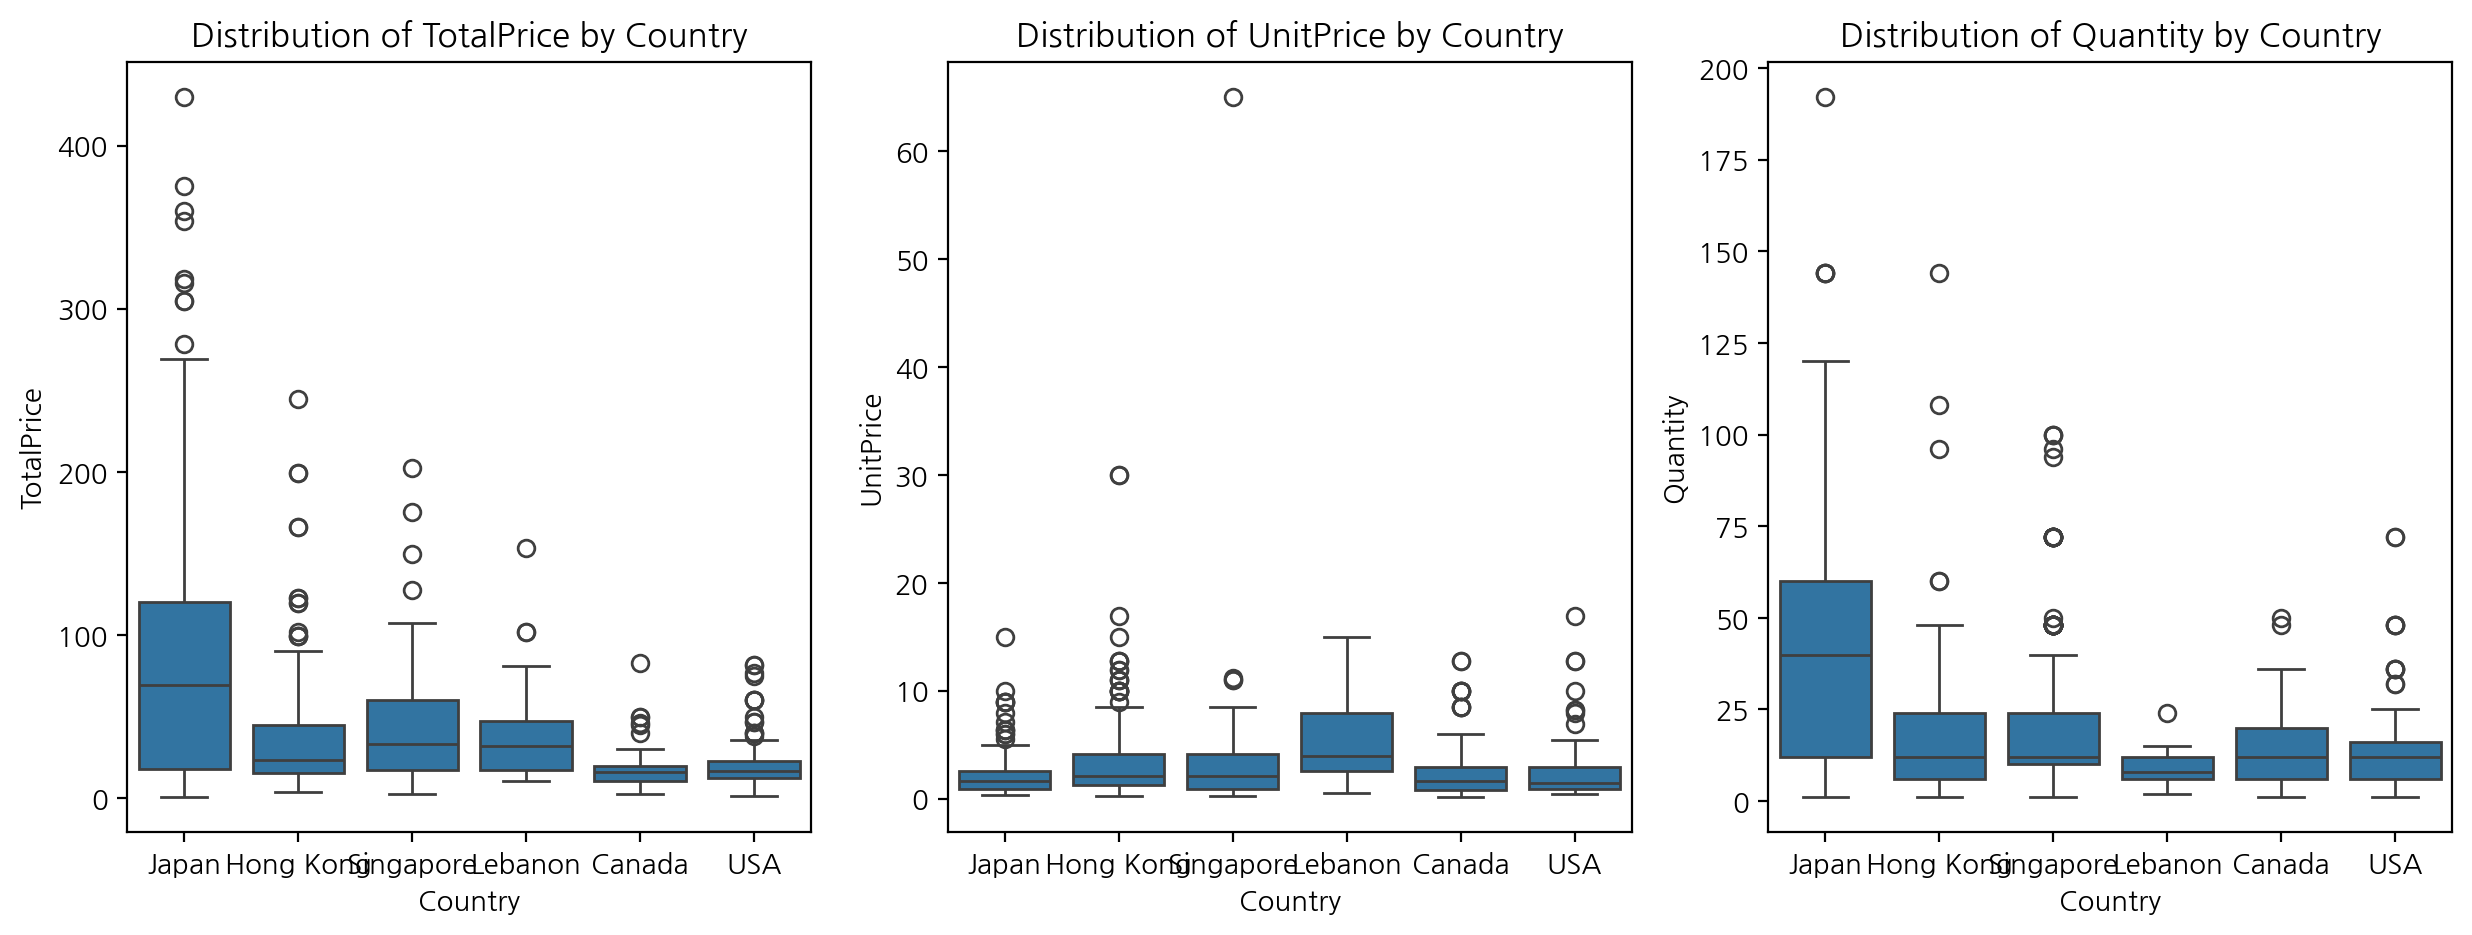

In [18]:
#이상치 재확인 (이상치를 제거하니 그래프가 좀 잘 보인다)

fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data=country_sub, y='TotalPrice', x='Country', ax=axes[0])
axes[0].set_title('Distribution of TotalPrice by Country')
sns.boxplot(data=country_sub, y='UnitPrice', x='Country', ax=axes[1])
axes[1].set_title('Distribution of UnitPrice by Country')
sns.boxplot(data=country_sub, y='Quantity', x='Country', ax=axes[2])
axes[2].set_title('Distribution of Quantity by Country')

In [19]:
#심슨역설 확인하기 위한 df_all 변수 임의 생성

country_all = df.copy()
country_all['Country'] = 'All'
df_all = pd.concat([country_all, country_sub])
df_all['Country'].value_counts()

All          530104
Japan           301
Hong Kong       280
Singapore       213
USA             179
Canada          148
Lebanon          45
Name: Country, dtype: int64

In [20]:
df_all = outlier_remove(df_all, 'TotalPrice')
df_all = outlier_remove(df_all, 'Quantity')
df_all = outlier_remove(df_all, 'UnitPrice')
df_all

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,All,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,All,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,All,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,All,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,All,12,20.34
...,...,...,...,...,...,...,...,...,...,...
524432,580553,20675,BLUE POLKADOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524433,580553,20676,RED RETROSPOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524434,580553,20975,12 PENCILS SMALL TUBE RED RETROSPOT,72,2011-12-05 10:14:00,0.65,12646.0,USA,12,46.80
524435,580553,22083,PAPER CHAIN KIT RETROSPOT,12,2011-12-05 10:14:00,2.95,12646.0,USA,12,35.40


In [21]:
#제시된 국가의 상관관계
corr = country_sub.groupby('Country')[['Quantity', 'UnitPrice', 'TotalPrice']].corr(numeric_only=True)

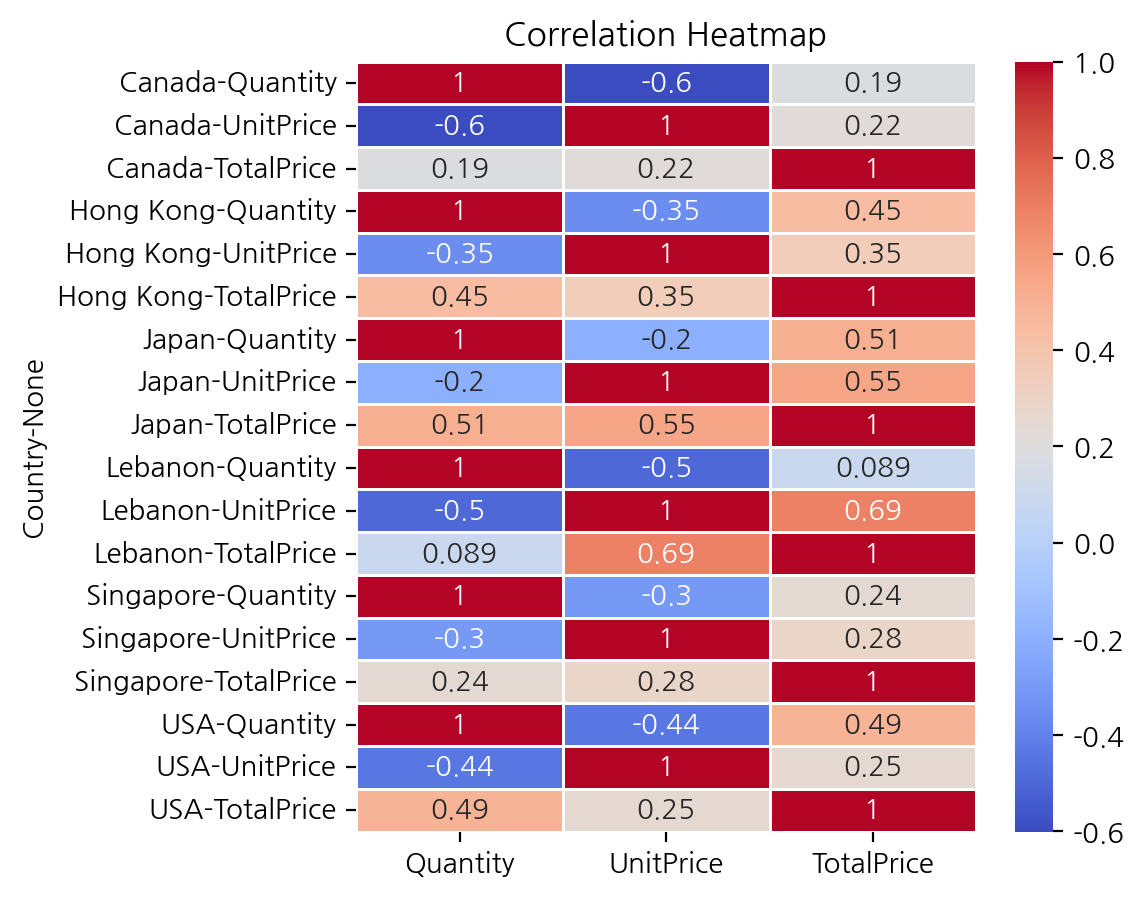

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', lw=0.5)
plt.title('Correlation Heatmap')
plt.show()

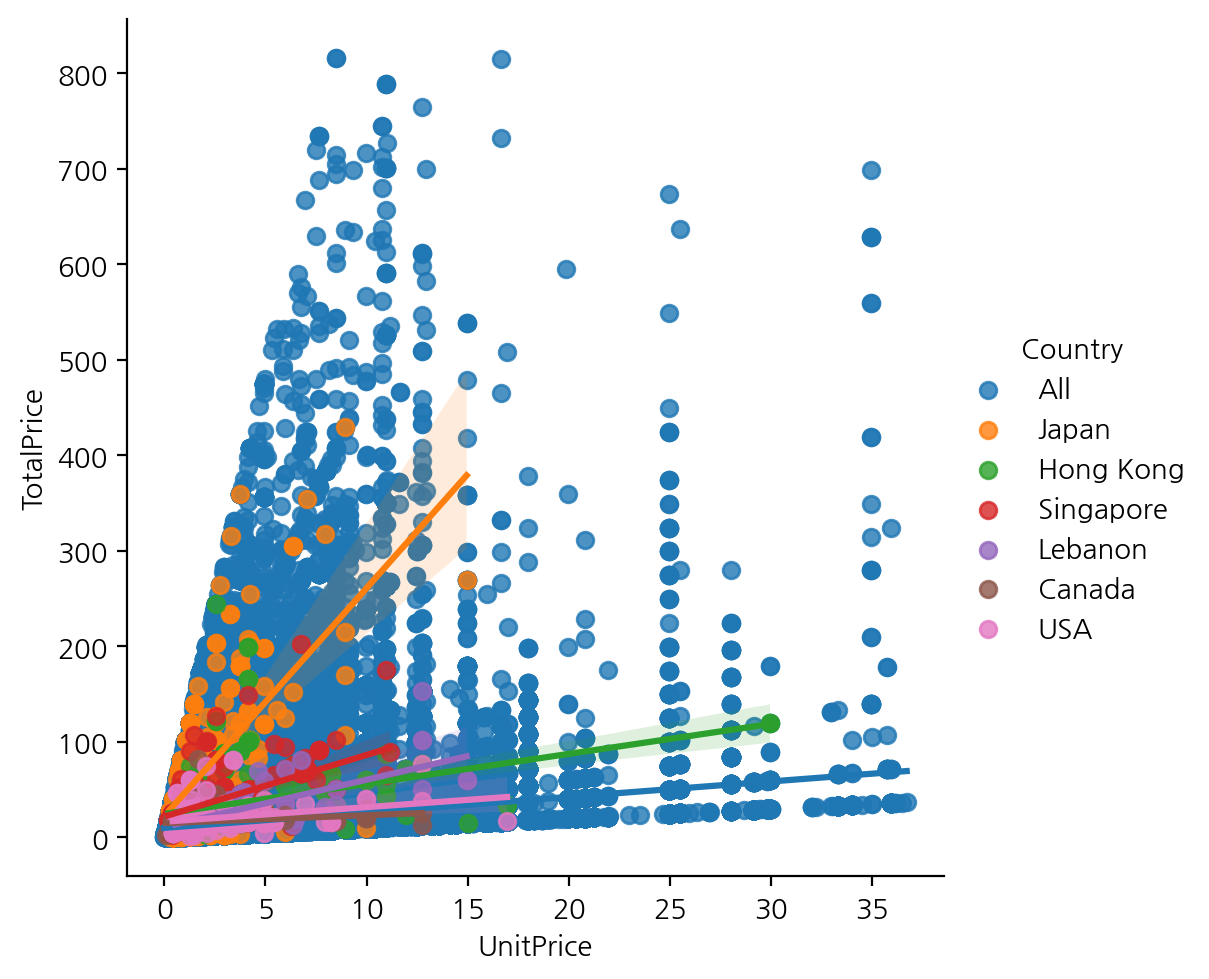

In [23]:
#이상치 제거 후, 제시된 국가들의 심슨의 역설 (lmplot)
sns.lmplot(data=df_all, x='UnitPrice', y='TotalPrice', hue='Country')

## 미션2) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalSales)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [24]:
import statsmodels.api as sm
# 데이터 전처리
# 결측치 제거 또는 대체
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])

# 전체데이터 이상치 처리
df = outlier_remove(df, 'TotalPrice')
df = outlier_remove(df, 'Quantity')
df = outlier_remove(df, 'UnitPrice')

# 단순 회귀분석
# 독립변수: UnitPrice, 종속변수: TotalPrice
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X) # 상수항 추가

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521969 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     521969 non-null  category      
 1   StockCode     521969 non-null  category      
 2   Description   521969 non-null  category      
 3   Quantity      521969 non-null  int32         
 4   InvoiceDate   521969 non-null  datetime64[ns]
 5   UnitPrice     521969 non-null  float64       
 6   CustomerID    390749 non-null  float32       
 7   Country       521969 non-null  object        
 8   InvoiceMonth  521969 non-null  int64         
 9   TotalPrice    521969 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.4+ MB


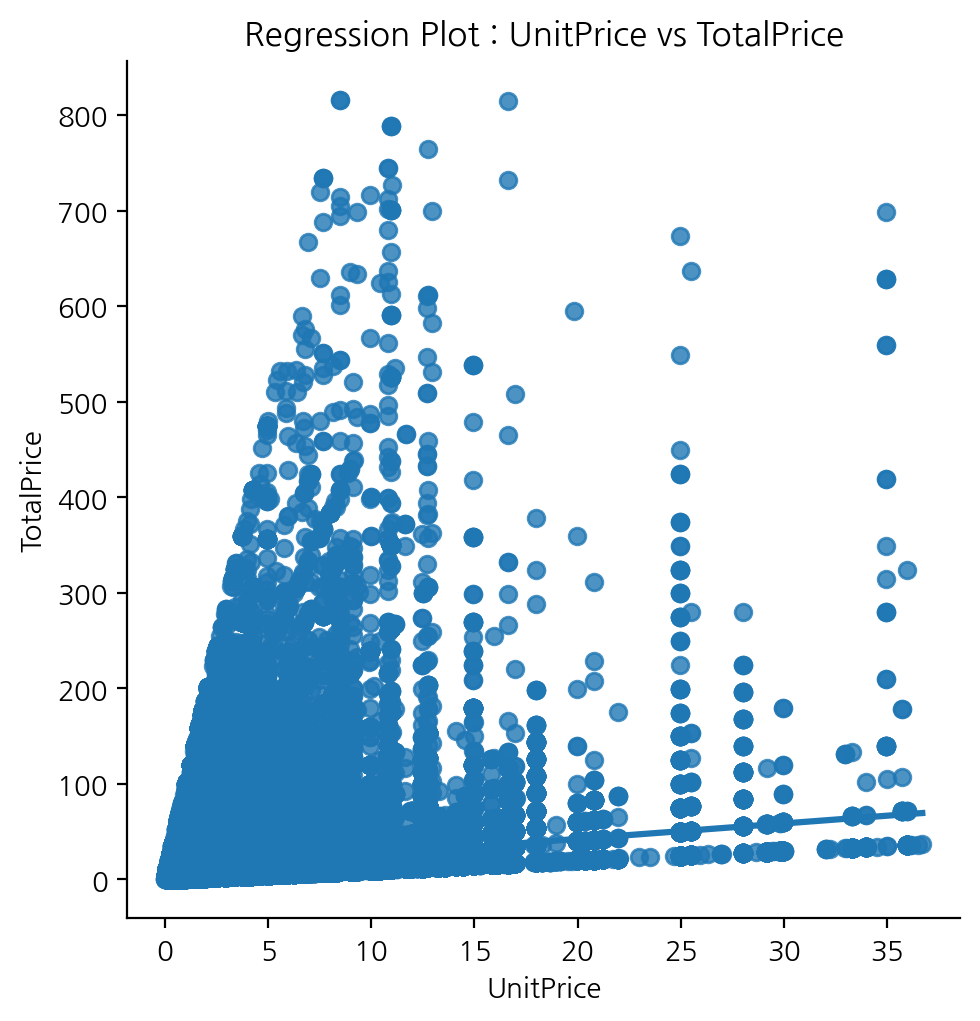

In [26]:
sns.lmplot(x='UnitPrice', y='TotalPrice', data=df)
plt.xlabel('UnitPrice')
plt.ylabel('TotalPrice')
plt.title('Regression Plot : UnitPrice vs TotalPrice')
plt.show()

In [27]:
import statsmodels.api as sm

#OLS 모델 피팅
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                 2.489e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:43:08   Log-Likelihood:            -2.4244e+06
No. Observations:              521969   AIC:                         4.849e+06
Df Residuals:                  521967   BIC:                         4.849e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0515      0.048    208.128      0.0

### 💡회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계 해석
1. R-squared (결정계수): 0.031   (1에 가까울수록 모델이 잘 설명한다는 뜻)  
모델이 데이터를 얼마나 잘 설명하는지를 나타내는 값으로, 0에서 1까지의 범위를 가지며, 0.031은 설명력이 낮다는 것을 의미한다.단순 회귀 모델로는 총 판매액의 변동을 잘 설명하지 못한다고 할 수 있다.

2. 회귀계수 (coef):  
const는 상수항으로, 단가가 0일 때의 총 판매액이다. 여기서는 12.7067로 나타난다.
UnitPrice는 단가의 회귀계수로, 단위 단가가 1 단위 증가할 때마다 총 판매액이 약 4.3839 단위 증가하는 경향이 있다.

3. P-value (P>|t|): 0~1사이  
const와 UnitPrice의 P-value는 0.000으로 유의수준 0.05에서 통계적으로 유의미하다. 즉, 단가와 총 판매액 간의 관계는 통계적으로 유의미하다고 할 수 있다. P value가 작을수록 귀무가설을 기각할 수 있다 (귀무가설 : 두 변수간에 관계가 없다)

4. F-statistic: 값이 클수록 모델이 통계적으로 유의미하다는 뜻  
F-통계량은 회귀모델이 존재하지 않는다는 귀무가설에 대한 검정을 나타낸다. 여기서는 269.7로 나타나며, 이는 모델이 통계적으로 유의미하다는 것을 의미한다.
  
결과적으로, 단가(UnitPrice)와 총 판매액(TotalPrice) 사이에는 양의 관계가 있으며, 단가가 증가할수록 총 판매액도 증가하는 경향이 있다. 그러나 결정계수가 낮아서 모델이 데이터를 잘 설명하지 못한다는 점에 주의해야 한다. 추가적인 변수나 모델 개선을 통해 설명력을 높일 수 있는지 고려할 필요가 있다.






## 미션3) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df_promotion["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [28]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] <= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [29]:
df_promotion

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,True,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,True,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,True,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,True,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
42448,539988,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2010-12-23 16:06:00,1.25,18116.0,United Kingdom,12,1.25,True,False
42449,539988,84849D,HOT BATHS SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0,United Kingdom,12,1.69,True,False
42450,539988,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0,United Kingdom,12,1.69,True,False
42451,539988,22854,CREAM SWEETHEART EGG HOLDER,2,2010-12-23 16:06:00,4.95,18116.0,United Kingdom,12,9.90,True,False


In [30]:
df_promotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25748 entries, 0 to 42452
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   InvoiceNo           25748 non-null  category      
 1   StockCode           25748 non-null  category      
 2   Description         25748 non-null  category      
 3   Quantity            25748 non-null  int32         
 4   InvoiceDate         25748 non-null  datetime64[ns]
 5   UnitPrice           25748 non-null  float64       
 6   CustomerID          25748 non-null  float32       
 7   Country             25748 non-null  object        
 8   InvoiceMonth        25748 non-null  int64         
 9   TotalPrice          25748 non-null  float64       
 10  IsChristmasPeriod   25748 non-null  bool          
 11  IsChristmasProduct  25748 non-null  bool          
dtypes: bool(2), category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memo

In [49]:
#대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
#크리스마스 상품 구매이력 있는 고객들
#관심이 유독 높은 고객들 식별 (50% 구간인 2개 초과 구매 고객들을 관심 많은 고객군으로 분류)
Christmas_group = df_promotion[df_promotion['IsChristmasProduct']==True].groupby(['CustomerID'])['IsChristmasProduct'].count()
interested_customers = Christmas_group[Christmas_group > 2]

In [50]:
Christmas_group.describe()

count    375.000000
mean       4.234667
std        5.139068
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       42.000000
Name: IsChristmasProduct, dtype: float64

In [34]:
interested_customers

CustomerID
12441.0     3
12472.0    20
12577.0     5
12748.0    42
12838.0    13
           ..
18041.0    17
18077.0     6
18118.0     7
18119.0     3
18239.0    11
Name: IsChristmasProduct, Length: 183, dtype: int64

<Axes: xlabel='InvoiceDate', ylabel='Quantity'>

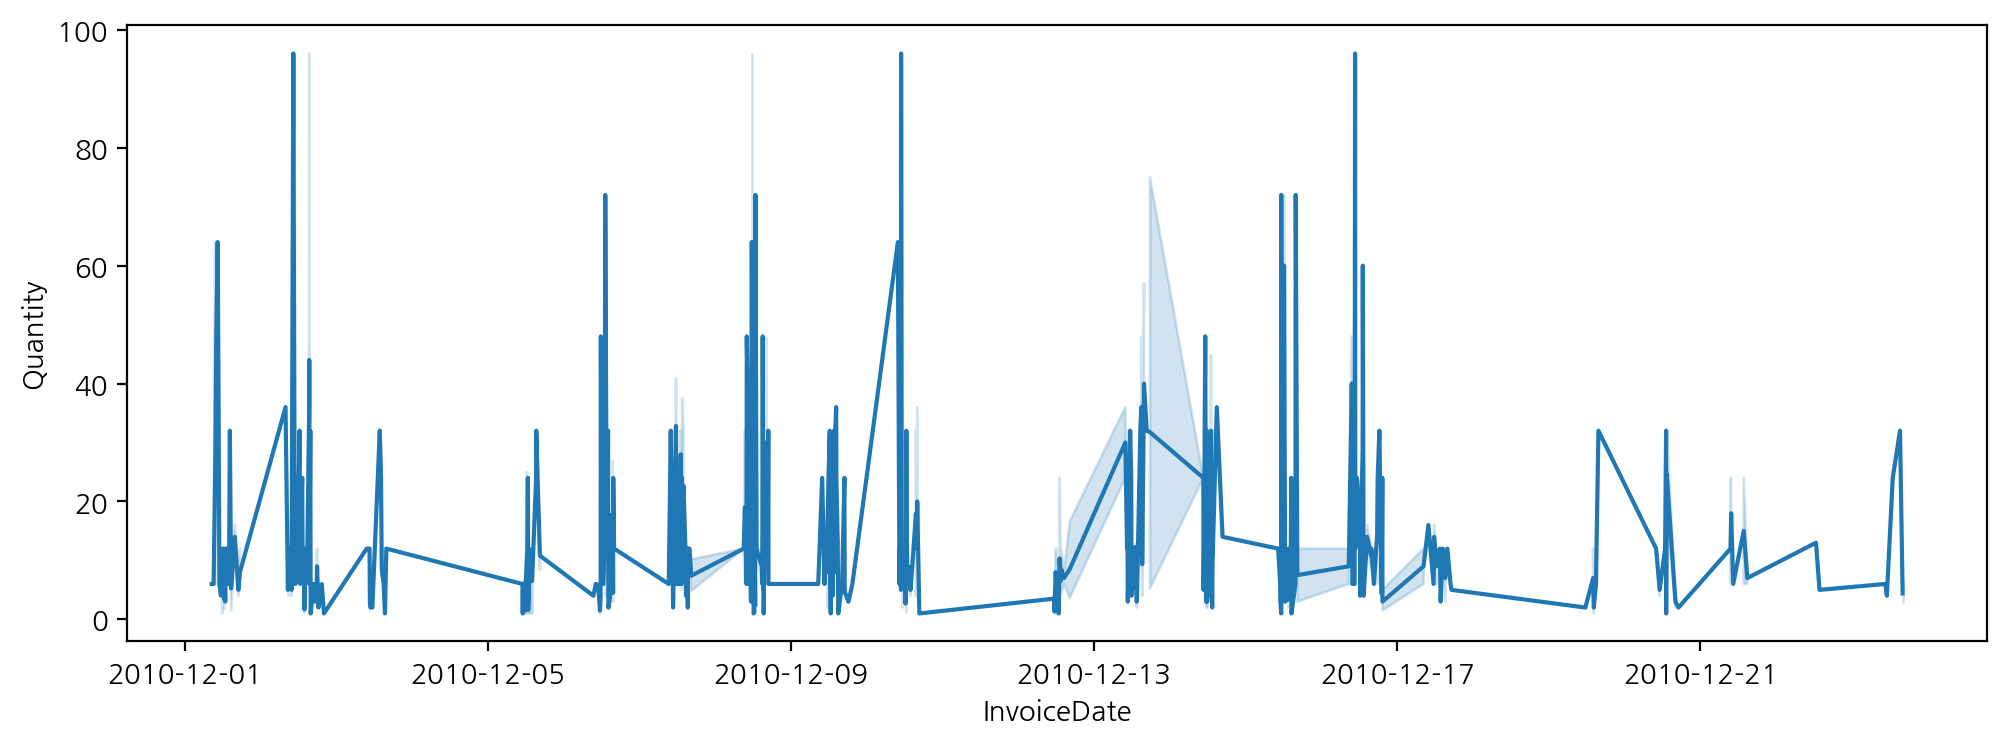

In [55]:
#크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다. 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.

plt.figure(figsize=(12,4))
sns.lineplot(x='InvoiceDate', y='Quantity', data=df_promotion)

In [60]:
#영국이 압도적으로 수량을 많이 샀다

df_promotion.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

Country
United Kingdom     193801
Germany              6777
France               4672
EIRE                 3796
Norway               3582
Japan                2505
Netherlands          1391
Belgium              1295
Portugal              984
Cyprus                917
Switzerland           712
Spain                 667
Lithuania             652
Finland               480
Australia             347
Denmark               334
Iceland               319
Italy                 295
Poland                140
Sweden                 90
Channel Islands        79
Austria                48
Name: Quantity, dtype: int32

## 미션4) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
import statsmodels.formula.api as smf
```

In [37]:
import statsmodels.formula.api as smf

In [38]:
# 다변량 회귀분석

model = smf.ols(formula='Quantity ~ IsChristmasProduct + UnitPrice + Country + IsChristmasPeriod', data=df_promotion)

# 모델 적합
result = model.fit()

# 회귀분석 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     128.0
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:43:09   Log-Likelihood:                -99715.
No. Observations:               25748   AIC:                         1.995e+05
Df Residuals:                   25724   BIC:                         1.997e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## 다변량 회귀분석 결과 해석 및 판매 전략 권장 사항
1. 모델 요약: 종속변수 (Dependent Variable): Quantity, 독립변수 (Independent Variables): IsChristmasProduct, Country, IsChristmasPeriod, UnitPrice  

2. 모델 해석:  
R-squared: 0.103로, 모델이 데이터를 약 10.3% 정도 설명함  
p-value = 0.074 : 크리스마스와 관련된 상품이 판매량에 어느 정도 양의 영향을 미칠 수 있음  
UnitPrice: coef = -1.0121, p-value < 0.001 : 제품 가격이 올라갈수록 평균적인 판매량은 1.0121씩 감소함 (p-value < 0.001로 통계적으로 유의미)  

3. 권장 사항:
* 크리스마스와 관련된 상품은 판매량에 어느 정도 영향을 미칠 수 있음. 크리스마스 테마의 마케팅 및 특별한 프로모션을 통해 이러한 상품을 강화하면 추가적인 수익 기회가 있을 것.

* 국가 변수들이 판매량에 영향을 미침. 특정 국가에서의 수요가 높으므로 해당 국가에 맞는 마케팅 전략을 도입. (핀란드, 일본, 네덜란드, 노르웨이 등 p value는 낮고, 상관계수는 높은 국가들 공략)

* 크리스마스 기간 강화: 크리스마스 기간에는 판매량이 높아지는 경향이 있으므로, 이 기간에 맞춘 마케팅 및 프로모션 강화 필요.

* 가격 조정 전략: 제품 가격이 평균 판매량에 부정적인 영향을 미침. 가격 할인이나 가격 조정 전략을 통해 고객 유치 및 판매량 증대를 고려.

* 상품 다양화: 특히 판매량이 낮은 국가나 크리스마스와 관련이 적은 상품의 다양성을 높여 새로운 고객층을 유치.

## 미션5) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = df.dropna()
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]
# 'WHITE HANGING HEART T-LIGHT HOLDER' 상품 구매 여부를 나타내는 타겟 변수 생성
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

False    6501
True     1990
Name: Target, dtype: int64

In [40]:
# 특성과 타겟 변수 분리
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']])
y = df['Target']


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report: ')
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[1169  129]
 [ 360   41]]

Classification Report: 
              precision    recall  f1-score   support

       False       0.76      0.90      0.83      1298
        True       0.24      0.10      0.14       401

    accuracy                           0.71      1699
   macro avg       0.50      0.50      0.49      1699
weighted avg       0.64      0.71      0.67      1699



## 💡해석
* accuracy : 0.71 (모델의 정확도는 71% 정도다)    
* precision : 0.24 (상품을 구매한 것으로 예측 시 실제 구매한 비율이며, 24%로 낮은 편)  
* recall : 0.1 (재현율. 실제 구매한 경우 모델이 얼마나 잘 예측했는지 나타내며, 10%로 낮음)  
* F1-score : 정밀도와 재현율의 조화평균으로, 상품을 구매한 경우의 F1이 낮게 나온다 (14%)

결론적으로, 정확도는 높으나, 상품을 구매 시 제대로 예측 못하고 있다.
